In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
#hola

In [176]:
data = pd.read_csv("data/wbes_sintetico.csv")
cols = [
    "sales_annual_usd",
    "labor_productivity_usd_per_employee",
    "employees",
    "firm_age_years",
    "training",
    "access_finance",
    "exporter",
    "competition_level",
    "digital_payments",
]

completeData = data[cols]

dataSinNulos = completeData.dropna()



In [177]:
dataSinNulos.shape

(1076, 9)

In [178]:
dataSinNulos.head()

,sales_annual_usd,labor_productivity_usd_per_employee,employees,firm_age_years,training,access_finance,exporter,competition_level,digital_payments
0,42879.327130,5374.714150,13.0,10.0,1.0,1.0,0,Media,1
1,54570.897174,4728.282631,9.0,6.0,0.0,0.0,0,Baja,1
2,56311.260030,3104.627628,15.0,10.0,0.0,0.0,1,Baja,1
3,93419.359675,3129.017055,25.0,12.0,1.0,0.0,1,Baja,1
4,24608.889361,2824.645056,9.0,9.0,0.0,0.0,0,Baja,0


In [179]:
X_train = np.array(dataSinNulos["labor_productivity_usd_per_employee"]).reshape(-1,1)
y_train = np.array(dataSinNulos["employees"])

In [180]:
r = linear_model.LinearRegression()
r.fit(X_train, y_train)

y_pred = r.predict(X_train)

print("coeficiente de correlacion: ",r.coef_)
print("interseccion: ", r.intercept_)
print("Error cuadratico de la media: ", mean_squared_error(y_train, y_pred))
print("varianza: ", r2_score(y_train, y_pred))

coeficiente de correlacion:  [-0.0015543]
interseccion:  16.692658718815103
Error cuadratico de la media:  59.588540406259895
varianza:  0.12709075911160717


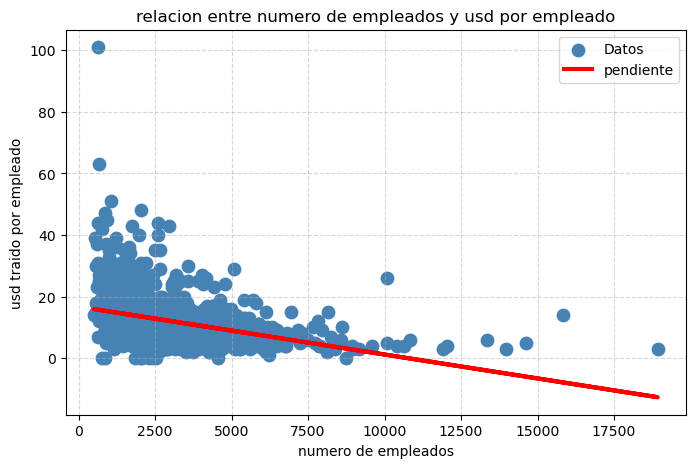

In [181]:
x = X_train.ravel()
plt.figure(figsize=(8,5))
plt.scatter(x, y_train, color="steelblue", s=80, label="Datos")
plt.plot(x, y_pred, color ="red", linewidth =3, label="pendiente")
plt.xlabel("numero de empleados")
plt.ylabel("usd traido por empleado")
plt.title("relacion entre numero de empleados y usd por empleado")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()